In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject.example

In [2]:
dataproject.example.hello_world()

'hello world'

In [3]:
# Import varios packages used in the Project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fetching data from Statistics Denmark using an API
import pydst
dst = pydst.Dst(lang='da')

In [4]:
# Import data from excel
#raw download from DST
# note: the file must be in a sub folder "data" to the folder where jupyter was launched
import os 
os.listdir('./data/')
# define filename refering to the path of the file.
filename = './Data/NGLK.xlsx'

In [5]:
# A quick overview of the data
pd.read_excel(filename).head(10)

,"Udvalgte kommunale regnskabstal efter prisenhed, brutto-/nettoudgifter, nøgletal, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Enhed: kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
2,Faste priser,Nettoudgifter,Langfristet gæld pr. indbygger,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
3,NaN,NaN,NaN,Region Hovedstaden,17544.0,16796.0,16901.0,15467.0,15078.0,14810.0,14236.0,13409.0,12905.0,11996.0
4,NaN,NaN,NaN,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
5,NaN,NaN,NaN,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
6,NaN,NaN,NaN,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
7,NaN,NaN,NaN,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
8,NaN,NaN,NaN,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
9,NaN,NaN,NaN,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0


In [6]:
# Getting the right columns and rows

#a) Skip first 3 rows
gaeld = pd.read_excel(filename, skiprows=2)
gaeld.head(10)

# b) The first couple of columns are not needed and contain only missing values (denoted by NaN (Not a Number)), 
#so we will drop those.
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
gaeld.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
gaeld.head(10)

# c) We rename the first column 'Unnamed: 3'
gaeld.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
gaeld.head(10)



,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
1,Region Hovedstaden,17544.0,16796.0,16901.0,15467.0,15078.0,14810.0,14236.0,13409.0,12905.0,11996.0
2,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
3,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
4,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
5,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
6,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
7,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0
8,Brøndby,12746.0,11929.0,13193.0,14653.0,14787.0,14879.0,14254.0,13568.0,11823.0,10958.0
9,Gentofte,8582.0,7845.0,8191.0,8233.0,7771.0,12203.0,16682.0,17753.0,18088.0,19172.0


We also see that the longterm debt. pr. capitta in 2008 has been named 2008. Having a variable that is named a number can cause problems with some functions (and many other programming languages do not even allow it), so let us change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2017} to {g2008, ..., g2017}.

In [7]:
myDict = {}
for i in range(2008, 2018): # range goes from 2008 to but not including 2018
    myDict[str(i)] = f'g{i}' 
myDict

{'2008': 'g2008',
 '2009': 'g2009',
 '2010': 'g2010',
 '2011': 'g2011',
 '2012': 'g2012',
 '2013': 'g2013',
 '2014': 'g2014',
 '2015': 'g2015',
 '2016': 'g2016',
 '2017': 'g2017'}

In [8]:
gaeld.rename(columns = myDict, inplace=True)
gaeld.head(10)

,municipality,g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017
0,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
1,Region Hovedstaden,17544.0,16796.0,16901.0,15467.0,15078.0,14810.0,14236.0,13409.0,12905.0,11996.0
2,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
3,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
4,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
5,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
6,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
7,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0
8,Brøndby,12746.0,11929.0,13193.0,14653.0,14787.0,14879.0,14254.0,13568.0,11823.0,10958.0
9,Gentofte,8582.0,7845.0,8191.0,8233.0,7771.0,12203.0,16682.0,17753.0,18088.0,19172.0


Now we choose to drope observations that are not actually municipalities

The dataset contains observations like "Region Hovedstaden", which is not a municipality so we want to drop such rows. To do this, we can use the df['var'].str functionalities, in particular df['var'].str.contains('PATTERN'). These rows are then deleted


In [9]:
for val in ['Region', 'Landsdel']: 
    I = gaeld.municipality.str.contains(val)
    gaeld = gaeld.loc[I == False] # keep everything else

In [10]:
gaeld.head(10)

,municipality,g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017
0,Hele landet,16382.0,16155.0,16498.0,16042.0,16095.0,16212.0,15967.0,15569.0,15151.0,14423.0
2,København,11915.0,10231.0,9718.0,6325.0,5583.0,4891.0,4307.0,3679.0,3208.0,2733.0
3,Frederiksberg,27854.0,27004.0,25761.0,24948.0,22782.0,21930.0,20169.0,18352.0,16920.0,15149.0
4,Dragør,15967.0,15822.0,16593.0,19763.0,22697.0,26398.0,25610.0,23476.0,21753.0,17913.0
5,Tårnby,81.0,65.0,83.0,64.0,50.0,38.0,23.0,14.0,9.0,4.0
6,Albertslund,18134.0,17701.0,21268.0,21147.0,20360.0,19149.0,18604.0,18208.0,24843.0,24184.0
7,Ballerup,17307.0,16852.0,19293.0,18442.0,17451.0,15825.0,15222.0,14282.0,13608.0,12884.0
8,Brøndby,12746.0,11929.0,13193.0,14653.0,14787.0,14879.0,14254.0,13568.0,11823.0,10958.0
9,Gentofte,8582.0,7845.0,8191.0,8233.0,7771.0,12203.0,16682.0,17753.0,18088.0,19172.0
10,Gladsaxe,15029.0,17502.0,16413.0,18620.0,18505.0,18908.0,18733.0,17289.0,18022.0,16841.0


Summary statistics

To get an overview of longterm debt pr. capita across municipalities we can use the function df.describe(). Note that each observation (municipality) is weighted equally.

In [11]:
gaeld.describe()

,g2008,g2009,g2010,g2011,g2012,g2013,g2014,g2015,g2016,g2017
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,18364.434343,18244.565657,18778.727273,18628.070707,18736.585859,18958.525253,19541.858586,19212.767677,18593.090909,17699.232323
std,10676.542728,10022.645718,10672.758464,10105.695715,9679.024038,9564.362815,13504.342918,14308.529490,13909.385898,13136.675894
min,81.000000,65.000000,83.000000,64.000000,50.000000,38.000000,23.000000,14.000000,9.000000,4.000000
25%,12716.000000,12467.500000,13072.000000,13004.000000,13364.500000,13560.000000,13354.500000,13288.500000,12805.000000,12119.500000
50%,16258.000000,16782.000000,16421.000000,17313.000000,17122.000000,17490.000000,17370.000000,17191.000000,16826.000000,15418.000000
75%,21138.000000,21913.000000,21845.500000,21137.500000,21291.500000,21952.000000,21261.500000,21399.000000,20831.500000,20554.500000
max,89892.000000,84360.000000,89616.000000,85807.000000,82394.000000,79657.000000,118038.000000,129930.000000,126416.000000,117540.000000


And to get a picture of the mean debt pr. capita pr. year

In [12]:
gaeld.mean()

g2008    18364.434343
g2009    18244.565657
g2010    18778.727273
g2011    18628.070707
g2012    18736.585859
g2013    18958.525253
g2014    19541.858586
g2015    19212.767677
g2016    18593.090909
g2017    17699.232323
dtype: float64

Transforming the data set from wide to long: In general, Pandas will assume that the variables in the wide format have a particular structure: namely they are of the form XPERIOD, where X is called the "stub". In our case, the variable names are e.g. g2011, so the stub is 'g' and the period (for that variable) is 2011.

In [13]:
gaeld_tall = pd.wide_to_long(gaeld, stubnames='g', i='municipality', j='year')
gaeld_tall.head(10)

,,g
municipality,year,
Hele landet,2008,16382.0
København,2008,11915.0
Frederiksberg,2008,27854.0
Dragør,2008,15967.0
Tårnby,2008,81.0
Albertslund,2008,18134.0
Ballerup,2008,17307.0
Brøndby,2008,12746.0
Gentofte,2008,8582.0


Note: The variables municipality and year are now in the index. We see that because they are "below" g in the head overview. We now reset the index.

In [14]:
gaeld_tall = gaeld_tall.reset_index()
gaeld_tall.head(10)

,municipality,year,g
0,Hele landet,2008,16382.0
1,København,2008,11915.0
2,Frederiksberg,2008,27854.0
3,Dragør,2008,15967.0
4,Tårnby,2008,81.0
5,Albertslund,2008,18134.0
6,Ballerup,2008,17307.0
7,Brøndby,2008,12746.0
8,Gentofte,2008,8582.0
9,Gladsaxe,2008,15029.0


Plotting the longterm debt pr. capita for the whole country using the builtin pandas plot function.

In [15]:
gaeld_tall['municipality2']=gaeld_tall['municipality']
gaeld_tall

,municipality,year,g,municipality2
0,Hele landet,2008,16382.0,Hele landet
1,København,2008,11915.0,København
2,Frederiksberg,2008,27854.0,Frederiksberg
3,Dragør,2008,15967.0,Dragør
4,Tårnby,2008,81.0,Tårnby
5,Albertslund,2008,18134.0,Albertslund
6,Ballerup,2008,17307.0,Ballerup
7,Brøndby,2008,12746.0,Brøndby
8,Gentofte,2008,8582.0,Gentofte
9,Gladsaxe,2008,15029.0,Gladsaxe


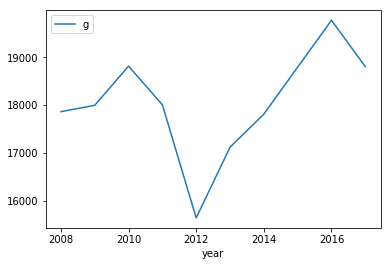

In [16]:
gaeld_tall.loc[gaeld_tall['municipality2'] == 'Køge', :].plot(x='year',y='g'); 

And plotting the same figure interactively for each municipality

In [17]:
# a) Import the relevant package
import ipywidgets as widgets

# define af simple function
def plot_e(dataframe, municipality,municipality2): 
    I = dataframe['municipality'] == municipality
    J = dataframe['municipality2'] == municipality2  
    ax_left=dataframe.loc[I,:].plot(x='year', y='g', style='-o', legend='False')
    ax_right=dataframe.loc[J,:].plot(x='year', y='g', style='-o', legend='False')
    ax_left.set_title('Long-term debt pr. capita in the municipality')
    ax_left.set_ylabel('Long-term debt pr. capita (kr.)')
    ax_right.set_title('(Net) Long-term debt pr. capita in the municipality')
    ax_right.set_ylabel('(Net) Long-term debt pr. capita (kr.)')

In [18]:
# b) creating the interactively plot
widgets.interact(plot_e, 
    dataframe = widgets.fixed(gaeld_tall),            
    municipality = widgets.Dropdown(description='Municipality1', options=gaeld_tall.municipality.unique(), value='København'),
    municipality2 = widgets.Dropdown(description='Municipality2', options=gaeld_tall.municipality2.unique(), value='Lejre')             
);

interactive(children=(Dropdown(description='Municipality1', index=1, options=('Hele landet', 'København', 'Fre…

Note få den anden slider til at virke.

The Graphs above gives a quick description of the development in the long-term debt pr. capita within each municipality. For a more thorough/broader comparasion between the development in each munipilicatity, one could compare a broader set of key figures for each municipality. This is done below;

In [47]:
indk_vars = dst.get_variables(table_id='NGLK')
indk_vars['values'][1][:13]

[{'id': 'DRI', 'text': 'Kommunale driftsudgifter pr. indbygger'},
 {'id': 'ÆLD', 'text': 'Ældre- og handicapudgifter pr. ældre'},
 {'id': 'FOL', 'text': 'Folkeskoleudgifter pr. folkeskoleelev'},
 {'id': 'DAG', 'text': 'Dagtilbudsudgifter pr. 0-10 årig'},
 {'id': 'SUN', 'text': 'Sundhedsudgifter pr. indbygger'},
 {'id': 'KUL', 'text': 'Kulturudgifter pr. indbygger'},
 {'id': 'TRA', 'text': 'Transport- og infrastrukturudgifter pr. indbygger'},
 {'id': 'ARB', 'text': 'Arbejdsmarkedsforanstaltningsudgifter pr. 16-64 årig'},
 {'id': 'UDL', 'text': 'Udlignings- og tilskudsbeløb pr. indbygger'},
 {'id': 'LAN', 'text': 'Langfristet gæld pr. indbygger'},
 {'id': 'SER', 'text': 'Serviceudgifter pr. indbygger'},
 {'id': 'ANL', 'text': 'Anlægsudgifter pr. indbygger'}]

In [54]:
# a) Download all of table NGLK and get a quick overview;
nglk_true = dst.get_data(table_id = 'NGLK', variables={'OMRÅDE':['*'], 'BNØGLE':['*'], 'PRISENHED':['*'], 'TID':['*']})
nglk_true.head(200)

#b) Define the following dictionaries
columns_dict = {}
columns_dict['OMRÅDE'] = 'municipality'
columns_dict['BNØGLE'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'
columns_dict['BRUTNETUDG'] = 'Measure'

var_dict = {} # var is for variable
var_dict['Kommunale driftsudgifter pr. indbygger'] = 'Driftsudgifter'
var_dict['Ældre- og handicapudgifter pr. ældre'] = 'Ældreudgifter pr. ældre'
var_dict['Folkeskoleudgifter pr. folkeskoleelev'] = 'Folkeskole'
var_dict['Dagtilbudsudgifter pr. 0-10 årig'] = 'Dagtilbud'
var_dict['Sundhedsudgifter pr. indbygger'] = 'Sundhed'
var_dict['Kulturudgifter pr. indbygger'] = 'Kultur'
var_dict['Transport- og infrastrukturudgifter pr. indbygger'] = 'Transport/infrastruktur'
var_dict['Arbejdsmarkedsforanstaltningsudgifter pr. 16-64 årig'] = 'Arbejdsmarked'
var_dict['Udlignings- og tilskudsbeløb pr. indbygger'] = 'Udligning/Tilskud'
var_dict['Langfristet gæld pr. indbygger'] = 'Gæld'
var_dict['Serviceudgifter pr. indbygger'] = 'Service'
var_dict['Anlægsudgifter pr. indbygger'] = 'Anlæg'

unit_dict = {} # Unit of measure
unit_dict['Faste priser'] = 'real'

# c) rename and replace
nglk_true.rename(columns=columns_dict,inplace=True)

# d) replace data
for key,value in var_dict.items():
   nglk_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
   nglk_true.unit.replace(key,value,inplace=True)

# e) keep if in var_dict
I = False
for key,value in var_dict.items():
    I = I | (nglk_true.variable == value)
nglk_true = nglk_true[I]

# f) Keep in in unit_dict;
J = False
for key,value in unit_dict.items():
    J = J | (nglk_true.unit == value)
nglk_true = nglk_true[J]
   
# g) convert values to numeric
nglk_true.value = nglk_true.value.astype('float')

# h) summary statistics
nglk_true.groupby(['variable','unit']).describe()

value                                       \
                               count          mean           std      min   
variable                unit                                                
Anlæg                   real  1040.0   2388.907692   1697.768560  -4863.0   
Arbejdsmarked           real  1040.0   1279.720192    639.938951   -768.0   
Dagtilbud               real  1040.0  38444.494231   7554.031797  26098.0   
Driftsudgifter          real  1040.0  58892.092308   5861.416876  47322.0   
Folkeskole              real  1040.0  64820.570192   8461.763849  45157.0   
Gæld                    real  1040.0  18552.879808  11394.908836      4.0   
Kultur                  real  1040.0   1621.505769    465.798475    734.0   
Sundhed                 real  1040.0   4425.006731    893.486919   2753.0   
Transport/infrastruktur real  1040.0   1894.917308   1466.955416   -524.0   
Udligning/Tilskud       real  1040.0 -15409.451923   9921.574984 -47294.0   
Ældreudgifter pr. ældre real  1040.0  56613.384615   8974.384094  34531.0   

                                                                       year  \
                                   25%      50%       75%       max   count   
variable                unit                                                  
Anlæg                   real   1588.25   2241.0   2992.00   25970.0  1040.0   
Arbejdsmarked           real    840.50   1336.5   1709.25    3575.0  1040.0   
Dagtilbud               real  33595.25  36406.0  41585.25   68995.0  1040.0   
Driftsudgifter          real  55003.25  58134.5  61064.50   90675.0  1040.0   
Folkeskole              real  60058.75  63911.0  68477.00  166977.0  1040.0   
Gæld                    real  13137.50  16566.5  21134.25  129930.0  1040.0   
Kultur                  real   1311.00   1545.5   1857.25    3509.0  1040.0   
Sundhed                 real   3525.75   4669.0   5101.25    6389.0  1040.0   
Transport/infrastruktur real   1471.00   1689.0   1967.75   19573.0  1040.0   
Udligning/Tilskud       real -20692.75 -16565.5 -11953.25   26073.0  1040.0   
Ældreudgifter pr. ældre real  50553.00  56421.5  61861.50   98796.0  1040.0   

                                                                        \
                                mean       std     min     25%     50%   
variable                unit                                             
Anlæg                   real  2012.5  2.873663  2008.0  2010.0  2012.5   
Arbejdsmarked           real  2012.5  2.873663  2008.0  2010.0  2012.5   
Dagtilbud               real  2012.5  2.873663  2008.0  2010.0  2012.5   
Driftsudgifter          real  2012.5  2.873663  2008.0  2010.0  2012.5   
Folkeskole              real  2012.5  2.873663  2008.0  2010.0  2012.5   
Gæld                    real  2012.5  2.873663  2008.0  2010.0  2012.5   
Kultur                  real  2012.5  2.873663  2008.0  2010.0  2012.5   
Sundhed                 real  2012.5  2.873663  2008.0  2010.0  2012.5   
Transport/infrastruktur real  2012.5  2.873663  2008.0  2010.0  2012.5   
Udligning/Tilskud       real  2012.5  2.873663  2008.0  2010.0  2012.5   
Ældreudgifter pr. ældre real  2012.5  2.873663  2008.0  2010.0  2012.5   

                                              
                                 75%     max  
variable                unit                  
Anlæg                   real  2015.0  2017.0  
Arbejdsmarked           real  2015.0  2017.0  
Dagtilbud               real  2015.0  2017.0  
Driftsudgifter          real  2015.0  2017.0  
Folkeskole              real  2015.0  2017.0  
Gæld                    real  2015.0  2017.0  
Kultur                  real  2015.0  2017.0  
Sundhed                 real  2015.0  2017.0  
Transport/infrastruktur real  2015.0  2017.0  
Udligning/Tilskud       real  2015.0  2017.0  
Ældreudgifter pr. ældre real  2015.0  2017.0

In [55]:
# Quick Overview;
nglk_true.head(20)

,municipality,variable,unit,year,Measure,value
6,Svendborg,Udligning/Tilskud,real,2008,Nettoudgifter,-15518.0
7,Svendborg,Udligning/Tilskud,real,2009,Nettoudgifter,-17476.0
8,Svendborg,Udligning/Tilskud,real,2010,Nettoudgifter,-19207.0
9,Svendborg,Udligning/Tilskud,real,2011,Nettoudgifter,-19722.0
10,Svendborg,Udligning/Tilskud,real,2012,Nettoudgifter,-22700.0
11,Svendborg,Udligning/Tilskud,real,2013,Nettoudgifter,-21272.0
12,Svendborg,Udligning/Tilskud,real,2014,Nettoudgifter,-20629.0
13,Svendborg,Udligning/Tilskud,real,2015,Nettoudgifter,-18923.0
14,Svendborg,Udligning/Tilskud,real,2016,Nettoudgifter,-19383.0
15,Svendborg,Udligning/Tilskud,real,2017,Nettoudgifter,-19087.0


Dropping observations that are not actually municipalities, but still keep whole country

In [64]:
for val in ['Region']: 
    I = nglk_true.municipality.str.contains(val)
    nglk_true = nglk_true.loc[I == False] # keep everything else
nglk_true.head(10)    

,municipality,variable,unit,year,Measure,value
6,Svendborg,Udligning/Tilskud,real,2008,Nettoudgifter,-15518.0
7,Svendborg,Udligning/Tilskud,real,2009,Nettoudgifter,-17476.0
8,Svendborg,Udligning/Tilskud,real,2010,Nettoudgifter,-19207.0
9,Svendborg,Udligning/Tilskud,real,2011,Nettoudgifter,-19722.0
10,Svendborg,Udligning/Tilskud,real,2012,Nettoudgifter,-22700.0
11,Svendborg,Udligning/Tilskud,real,2013,Nettoudgifter,-21272.0
12,Svendborg,Udligning/Tilskud,real,2014,Nettoudgifter,-20629.0
13,Svendborg,Udligning/Tilskud,real,2015,Nettoudgifter,-18923.0
14,Svendborg,Udligning/Tilskud,real,2016,Nettoudgifter,-19383.0
15,Svendborg,Udligning/Tilskud,real,2017,Nettoudgifter,-19087.0


In [80]:
# Lav interaktivt plot her for alle udgiftstyper på tværst af kommuner.

AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

TraitError: Invalid selection: value not found